<a href="https://colab.research.google.com/github/AndreMoreira00/BTC_AI/blob/main/BTC_Facebook_Prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Previsão Bitcoin

In [4]:
! pip install fbprophet

  Using cached fbprophet-0.7.1.tar.gz (64 kB)
  Preparing metadata (setup.py) ... done
  Using cached cmdstanpy-0.9.5-py3-none-any.whl.metadata (2.9 kB)
  Using cached pystan-3.10.0-py3-none-any.whl.metadata (3.7 kB)
  Using cached LunarCalendar-0.0.9-py2.py3-none-any.whl.metadata (6.3 kB)
  Using cached convertdate-2.4.0-py3-none-any.whl.metadata (8.3 kB)
  Using cached setuptools_git-1.2-py2.py3-none-any.whl.metadata (5.8 kB)
  Using cached PyMeeus-0.5.12-py3-none-any.whl
  Using cached ephem-4.1.5-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.0 kB)
  Using cached clikit-0.6.2-py2.py3-none-any.whl.metadata (1.6 kB)
  Using cached httpstan-4.13.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.2 kB)
  Using cached pysimdjson-6.0.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (1.9 kB)
  Using cached crashtest-0.3.1-py3-none-any.whl.metadata (748 bytes)
  Using cached pastel-0.2.1-py2.py3-none-any.whl.metadata (1.9 k

In [5]:
from prophet import Prophet
import pandas as pd

In [6]:
dataset = pd.read_csv('/content/BTC-USD-D.csv')
dataset

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...,...
3609,2024-08-04,60676.093750,61062.988281,57210.804688,58116.976563,58116.976563,31758917219
3610,2024-08-05,58110.296875,58268.828125,49121.238281,53991.457031,53991.457031,108991085584
3611,2024-08-06,53991.347656,57059.917969,53973.273438,56034.316406,56034.316406,49300484106
3612,2024-08-07,56040.632813,57726.882813,54620.507813,55027.460938,55027.460938,41637562185


In [7]:
dataset.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3614.000000,3614.000000,3614.000000,3614.000000,3614.000000,3.614000e+03
mean,17347.835961,17743.099023,16923.945907,17362.994639,17362.994639,1.749113e+10
std,19232.285710,19664.552659,18753.748099,19241.019537,19241.019537,1.922302e+10
min,176.897003,211.731003,171.509995,178.102997,178.102997,5.914570e+06
25%,1105.912476,1127.815003,1075.819977,1115.655029,1115.655029,2.708015e+08
50%,8962.529785,9205.565430,8796.501465,8991.542481,8991.542481,1.364765e+10
75%,28403.526856,28891.608398,27883.912598,28414.569824,28414.569824,2.819884e+10
max,73079.375000,73750.070313,71334.093750,73083.500000,73083.500000,3.509679e+11


In [8]:
dataset.drop(columns=['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis=1)

,Date,Close
0,2014-09-17,457.334015
1,2014-09-18,424.440002
2,2014-09-19,394.795990
3,2014-09-20,408.903992
4,2014-09-21,398.821014
...,...,...
3609,2024-08-04,58116.976563
3610,2024-08-05,53991.457031
3611,2024-08-06,56034.316406
3612,2024-08-07,55027.460938


In [9]:
dataset = dataset[['Date', 'Close']].rename(columns = {'Date': 'ds', 'Close': 'y'})
dataset

,ds,y
0,2014-09-17,457.334015
1,2014-09-18,424.440002
2,2014-09-19,394.795990
3,2014-09-20,408.903992
4,2014-09-21,398.821014
...,...,...
3609,2024-08-04,58116.976563
3610,2024-08-05,53991.457031
3611,2024-08-06,56034.316406
3612,2024-08-07,55027.460938


In [10]:
dataset = dataset.sort_values(by = 'ds')
dataset

,ds,y
0,2014-09-17,457.334015
1,2014-09-18,424.440002
2,2014-09-19,394.795990
3,2014-09-20,408.903992
4,2014-09-21,398.821014
...,...,...
3609,2024-08-04,58116.976563
3610,2024-08-05,53991.457031
3611,2024-08-06,56034.316406
3612,2024-08-07,55027.460938


## Construção do modelo e previsões

In [11]:
model = Prophet()
model.fit(dataset)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_6p7ji56/4q8bst5a.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_6p7ji56/xff6taqj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42117', 'data', 'file=/tmp/tmp_6p7ji56/4q8bst5a.json', 'init=/tmp/tmp_6p7ji56/xff6taqj.json', 'output', 'file=/tmp/tmp_6p7ji56/prophet_modelkh9o11f_/prophet_model-20240811002748.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:27:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:27:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [12]:
future = model.make_future_dataframe(periods=360)

In [13]:
forecast = model.predict(future)

In [14]:
forecast[['ds', 'yhat']].tail()

,ds,yhat
3969,2025-07-30,83643.117768
3970,2025-07-31,83689.781145
3971,2025-08-01,83784.223418
3972,2025-08-02,83884.403860
3973,2025-08-03,83983.297656


In [15]:
len(dataset), len(forecast)

(3614, 3974)

In [16]:
len(forecast) - len(dataset)

360

In [17]:
forecast.tail(360)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
3614,2024-08-09,61171.470107,53875.034315,66747.068271,61171.470107,61171.470107,-637.061389,-637.061389,-637.061389,-22.126508,-22.126508,-22.126508,-614.934881,-614.934881,-614.934881,0.0,0.0,0.0,60534.408719
3615,2024-08-10,61236.982025,54328.616371,66935.115063,61236.982025,61236.982025,-629.967943,-629.967943,-629.967943,-15.950276,-15.950276,-15.950276,-614.017668,-614.017668,-614.017668,0.0,0.0,0.0,60607.014082
3616,2024-08-11,61302.493943,53786.372779,67674.520192,61302.493943,61302.493943,-624.679710,-624.679710,-624.679710,-7.910508,-7.910508,-7.910508,-616.769202,-616.769202,-616.769202,0.0,0.0,0.0,60677.814233
3617,2024-08-12,61368.005860,54832.770133,67773.628326,61368.005860,61368.005860,-582.123115,-582.123115,-582.123115,41.136403,41.136403,41.136403,-623.259518,-623.259518,-623.259518,0.0,0.0,0.0,60785.882745
3618,2024-08-13,61433.517778,54119.388409,67349.590737,61433.517778,61433.517778,-643.360910,-643.360910,-643.360910,-9.814476,-9.814476,-9.814476,-633.546433,-633.546433,-633.546433,0.0,0.0,0.0,60790.156868
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3969,2025-07-30,84428.200888,68814.260095,99888.273064,71079.072580,99492.765298,-785.083121,-785.083121,-785.083121,34.109500,34.109500,34.109500,-819.192621,-819.192621,-819.192621,0.0,0.0,0.0,83643.117768
3970,2025-07-31,84493.712806,69434.973734,100104.697032,71099.930656,99604.352251,-803.931662,-803.931662,-803.931662,-19.444136,-19.444136,-19.444136,-784.487526,-784.487526,-784.487526,0.0,0.0,0.0,83689.781145
3971,2025-08-01,84559.224724,69340.391710,100767.546377,71128.739810,99734.349312,-775.001306,-775.001306,-775.001306,-22.126508,-22.126508,-22.126508,-752.874798,-752.874798,-752.874798,0.0,0.0,0.0,83784.223418
3972,2025-08-02,84624.736641,68785.181816,100872.161635,71101.635092,99858.780724,-740.332781,-740.332781,-740.332781,-15.950276,-15.950276,-15.950276,-724.382506,-724.382506,-724.382506,0.0,0.0,0.0,83884.403860


## Gráfico das previsões

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


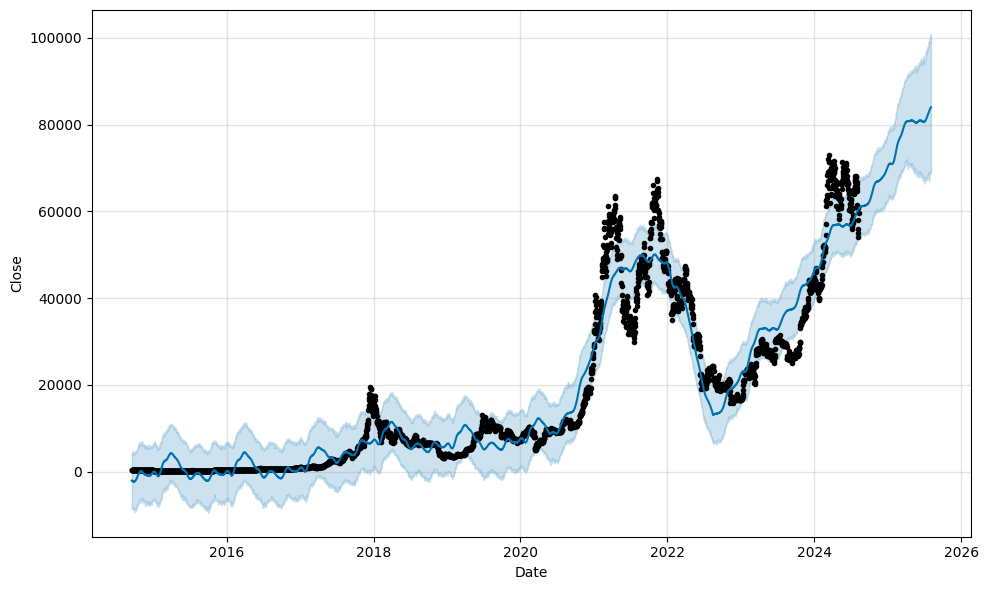

In [18]:
model.plot(forecast, xlabel = 'Date', ylabel = 'Close');

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` o

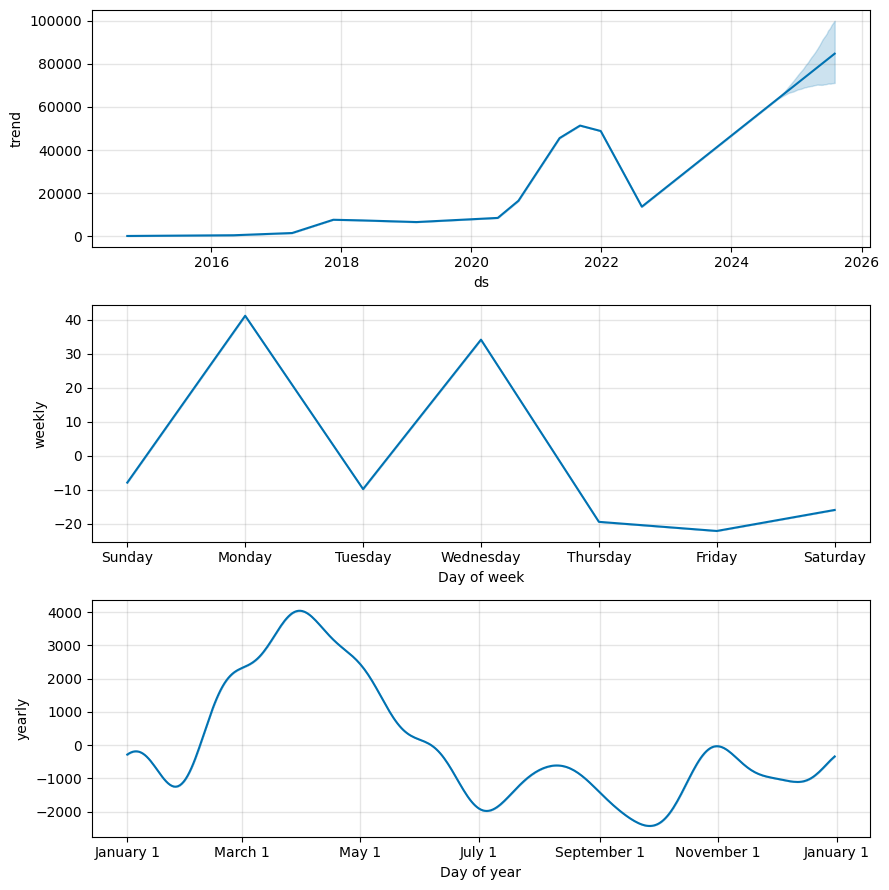

In [19]:
model.plot_components(forecast);

In [20]:
from prophet.plot import plot_plotly, plot_components_plotly

In [21]:
plot_plotly(model, forecast)

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  v = v.dt.to_pydatetime()


In [22]:
plot_components_plotly(model, forecast)

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



## Scores

In [37]:
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, r2_score

In [38]:
mean_absolute_percentage_error(dataset['y'], forecast[:3614]['trend'])

0.24545841373898403

In [35]:
mean_absolute_error(dataset['y'], forecast[:3614]['trend'])

3337.8970364839097

In [36]:
r2_score(dataset['y'], forecast[:3614]['trend'])

0.9209258560264252